# 📊 Machine Learning untuk Prediksi Biaya Asuransi Kesehatan

## 🎯 Tujuan Pembelajaran
Selamat datang di notebook pembelajaran Machine Learning! Dalam sesi ini, kita akan mempelajari bagaimana mempersiapkan data untuk menggunakan dua algoritma pembelajaran mesin yang powerful:
- **SVM (Support Vector Machine)** 
- **XGBoost (Extreme Gradient Boosting)**

Jangan khawatir jika kamu belum pernah coding sebelumnya - kita akan belajar langkah demi langkah! 🚀

---


## 💡 Mengapa Ini Penting untuk Aktuaris?
Sebagai seorang aktuaris, kemampuan memprediksi biaya asuransi dengan akurat sangat penting untuk:
- Menentukan premi yang tepat
- Mengelola risiko perusahaan asuransi
- Membuat keputusan bisnis yang data-driven

Machine Learning membantu kita menemukan pola kompleks dalam data yang mungkin tidak terlihat dengan analisis tradisional.

---

## 📚 Bagian 1: Persiapan Data untuk Machine Learning

Sebelum kita bisa menggunakan algoritma Machine Learning, kita perlu mempersiapkan data kita. Bayangkan seperti kamu sedang mempersiapkan bahan-bahan sebelum memasak - semua harus siap dan terorganisir dengan baik!

### 🎬 Langkah-langkah yang akan kita lakukan:
1. **Import Libraries** - Mengimpor alat-alat yang kita butuhkan
2. **Load Dataset** - Memuat data asuransi kesehatan
3. **Explore Data** - Melihat seperti apa data kita
4. **Split Data** - Membagi data menjadi data training (80%) dan validation (20%)

---

### 📦 Langkah 1: Import Libraries

**Apa itu Library?**
Library adalah kumpulan kode yang sudah dibuat oleh orang lain untuk memudahkan pekerjaan kita. Bayangkan seperti menggunakan kalkulator yang sudah jadi, daripada membuat kalkulator sendiri!

**Library yang akan kita gunakan:**
- **`pandas`** 📊 - Untuk mengelola data dalam bentuk tabel (seperti Excel)
- **`numpy`** 🔢 - Untuk operasi matematika dan array
- **`train_test_split`** ✂️ - Untuk membagi data menjadi training dan validation set
- **`matplotlib & seaborn`** 📈 - Untuk membuat visualisasi data yang menarik

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Setting untuk visualisasi yang lebih cantik
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Semua library berhasil diimport!")
print("🎉 Kita siap untuk memulai analisis data!")

✅ Semua library berhasil diimport!
🎉 Kita siap untuk memulai analisis data!


---

### 🔍 Checkpoint Question 1
**Pikirkan sejenak:** Mengapa kita perlu menggunakan library seperti pandas dan numpy? Bisakah kita melakukan semua perhitungan secara manual?

<details>
<summary>💭 Klik untuk melihat penjelasan</summary>

Secara teknis, kita *bisa* melakukan semuanya secara manual, tetapi:
- **Pandas** membuat kita bisa mengelola jutaan baris data dengan mudah (bayangkan mengelola 100,000 baris di Excel!)
- **NumPy** melakukan perhitungan matematika ribuan kali lebih cepat
- **Sklearn** sudah mengimplementasikan algoritma ML yang kompleks dengan optimal

Menggunakan library adalah praktik standar dalam industri - fokus pada solusi, bukan reinventing the wheel! 🚀
</details>

---

### 📂 Langkah 2: Memuat Dataset

Sekarang kita akan memuat data asuransi kesehatan kita. Data ini berisi informasi tentang:
- Informasi demografis (usia, jenis kelamin, wilayah, dll)
- Informasi kesehatan (BMI, status merokok, kondisi kesehatan, dll)
- Informasi asuransi (tipe plan, premi, klaim, dll)
- **Target variable:** `annual_medical_cost` - biaya medis tahunan yang ingin kita prediksi

**Fungsi yang digunakan:** `pd.read_csv()`
- **Apa yang dilakukan?** Membaca file CSV (Comma-Separated Values) dan mengubahnya menjadi DataFrame
- **DataFrame** adalah struktur data berbentuk tabel (seperti spreadsheet Excel)

In [2]:
# Memuat dataset
df = pd.read_csv('medical_insurance.csv')

# Menampilkan informasi dasar tentang dataset
print("=" * 60)
print("📊 INFORMASI DATASET")
print("=" * 60)
print(f"Jumlah baris (observations): {df.shape[0]:,}")
print(f"Jumlah kolom (features): {df.shape[1]}")
print(f"\n✅ Dataset berhasil dimuat!")
print("=" * 60)

📊 INFORMASI DATASET
Jumlah baris (observations): 100,000
Jumlah kolom (features): 54

✅ Dataset berhasil dimuat!


---

### 👀 Langkah 3: Eksplorasi Data Awal

Mari kita lihat seperti apa data kita! Ini penting untuk memahami struktur dan isi data sebelum kita melakukan analisis lebih lanjut.

**Fungsi yang akan digunakan:**
- **`.head()`** - Menampilkan 5 baris pertama data
- **`.info()`** - Menampilkan informasi tentang tipe data dan missing values
- **`.describe()`** - Menampilkan statistik deskriptif (mean, std, min, max, dll)

In [3]:
# Melihat 5 baris pertama data
print("🔍 Preview 5 Baris Pertama Data:\n")
display(df.head())

🔍 Preview 5 Baris Pertama Data:



,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [4]:
# Melihat informasi tentang tipe data dan missing values
print("\n" + "=" * 60)
print("📋 INFORMASI DETAIL DATASET")
print("=" * 60)
df.info()


📋 INFORMASI DETAIL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       10

---

### 🔍 Penjelasan tentang Missing Values pada `alcohol_freq`

Sebelum kita melanjutkan ke statistik deskriptif, mari kita bahas tentang missing values yang ditemukan pada kolom `alcohol_freq`.

#### 🤔 Apa itu Missing Values?

**Missing values** (nilai yang hilang) adalah data yang tidak tercatat atau tidak tersedia dalam dataset. Di pandas, missing values biasanya ditandai dengan:
- `NaN` (Not a Number)
- `None` 
- `null`

#### 📊 Missing Values di Dataset Kita

Dari hasil checking di atas, kita menemukan:
- **Kolom `alcohol_freq`** memiliki **30,083 missing values** (~30% dari data)
- Semua kolom lainnya **tidak memiliki missing values** ✅

#### 💡 Interpretasi: Mengapa `alcohol_freq` Memiliki Missing Values?

Dalam konteks data asuransi kesehatan, missing values pada `alcohol_freq` sebenarnya **memiliki makna**:

**Missing Value = Tidak Minum Alkohol** 🚫🍺

- Orang yang **tidak pernah** minum alkohol mungkin **tidak mengisi** pertanyaan tentang frekuensi minum alkohol
- Dalam survei/formulir asuransi, jika seseorang menjawab "Tidak" pada "Apakah Anda minum alkohol?", maka pertanyaan "Seberapa sering?" akan di-skip
- Ini adalah **missing not at random (MNAR)** - missing-nya punya pattern dan makna

#### 🛠️ Strategi Handling Missing Values

Ada beberapa strategi yang bisa digunakan:

**1. Hapus Baris (Drop Rows)** ❌
```python
df_cleaned = df.dropna()  # Tidak recommended!
```
- ❌ Kehilangan 30% data (30,000+ rows!)
- ❌ Mengurangi kemampuan model untuk belajar
- ❌ Bias terhadap orang yang minum alkohol saja

**2. Imputasi dengan Modus/Mean** ⚠️
```python
most_frequent = df['alcohol_freq'].mode()[0]
df['alcohol_freq'].fillna(most_frequent)  # Kurang tepat
```
- ⚠️ Bisa misleading karena missing value punya makna khusus
- ⚠️ Tidak merepresentasikan kondisi sebenarnya

**3. Buat Kategori Baru: "Never" atau "No Alcohol"** ✅ (Yang kita gunakan!)
```python
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')
```
- ✅ Merepresentasikan kondisi sebenarnya
- ✅ Tidak menghilangkan data
- ✅ Interpretable dan masuk akal

#### 🎯 Implementasi di Notebook Kita

Di **cell berikutnya** (Cell 12), kita akan:
1. Mengisi missing values dengan kategori **'Never'**
2. Memverifikasi bahwa tidak ada lagi missing values
3. Melihat distribusi kategori `alcohol_freq` setelah handling

**Setelah handling, kategori `alcohol_freq` akan menjadi:**
- `Never` - Tidak pernah minum alkohol (termasuk yang tadinya NaN)
- `Occasional` - Kadang-kadang
- `Weekly` - Mingguan
- `Daily` - Harian

#### 📌 Pelajaran Penting

> **Missing Values tidak selalu "buruk" atau harus dihapus!**
> 
> Dalam Machine Learning, memahami **WHY data is missing** sama pentingnya dengan **HOW to handle it**.

**Best Practice:**
1. **Investigate** - Pahami kenapa data missing
2. **Interpret** - Apakah missing value punya makna?
3. **Decide** - Pilih strategi handling yang paling sesuai dengan konteks bisnis/domain

---

**💡 Tip untuk Aktuaris:**
Dalam praktik aktuarial, handling missing values dengan benar sangat penting untuk:
- Risk assessment yang akurat
- Premium pricing yang fair
- Kepatuhan terhadap regulasi (tidak diskriminatif)

---

In [5]:
# Menangani missing values pada kolom alcohol_freq
# NaN/None pada kolom ini berarti orang tersebut tidak minum alkohol
# Kita akan mengisi NaN dengan kategori 'Never'

print("=" * 60)
print("🔧 HANDLING MISSING VALUES - alcohol_freq")
print("=" * 60)

# Cek missing values sebelum handling
missing_before = df['alcohol_freq'].isnull().sum()
print(f"\n📊 Missing values sebelum handling: {missing_before:,} ({missing_before/len(df)*100:.2f}%)")

# Mengisi NaN dengan 'Never' karena artinya tidak minum alkohol
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')

# Cek missing values setelah handling
missing_after = df['alcohol_freq'].isnull().sum()
print(f"✅ Missing values setelah handling: {missing_after:,}")

# Menampilkan distribusi alcohol_freq setelah handling
print(f"\n📈 Distribusi alcohol_freq setelah handling:")
print(df['alcohol_freq'].value_counts().sort_index())

print("\n" + "=" * 60)
print("✅ Missing values berhasil ditangani!")
print("💡 Interpretasi: NaN diubah menjadi 'Never' (tidak minum alkohol)")
print("=" * 60)

🔧 HANDLING MISSING VALUES - alcohol_freq

📊 Missing values sebelum handling: 30,083 (30.08%)
✅ Missing values setelah handling: 0

📈 Distribusi alcohol_freq setelah handling:
alcohol_freq
Daily          5006
Never         30083
Occasional    45078
Weekly        19833
Name: count, dtype: int64

✅ Missing values berhasil ditangani!
💡 Interpretasi: NaN diubah menjadi 'Never' (tidak minum alkohol)


In [6]:
# Melihat statistik deskriptif untuk kolom numerik
print("\n" + "=" * 60)
print("📈 STATISTIK DESKRIPTIF")
print("=" * 60)
display(df.describe())


📈 STATISTIK DESKRIPTIF


,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [7]:
# Mengecek missing values
print("\n" + "=" * 60)
print("🔍 CEK MISSING VALUES")
print("=" * 60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase (%)': missing_percentage.values
})

missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✅ Tidak ada missing values dalam dataset!")
    print("👍 Data sudah bersih dan siap digunakan!")


🔍 CEK MISSING VALUES
✅ Tidak ada missing values dalam dataset!
👍 Data sudah bersih dan siap digunakan!
✅ Tidak ada missing values dalam dataset!
👍 Data sudah bersih dan siap digunakan!


---

### 🎯 Langkah 4: Visualisasi Target Variable

Sebelum kita membagi data, mari kita lihat distribusi dari variable target kita: **`annual_medical_cost`**

Ini penting karena:
- Membantu kita memahami rentang nilai yang akan kita prediksi
- Mendeteksi outliers (nilai yang tidak normal)
- Mengetahui apakah data kita skewed (miring) atau normal

/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_41690/2157948496.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_41690/2157948496.py:17: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/martinmanullang/miniconda3/envs/py310_campursari/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/martinmanullang/miniconda3/envs/py310_campursari/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


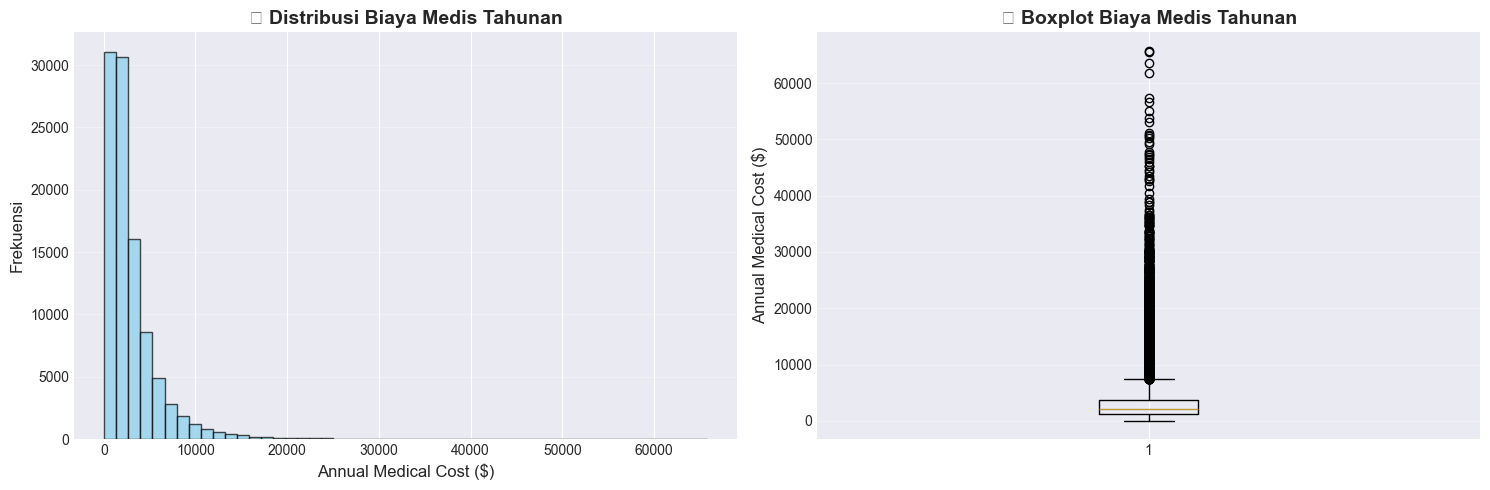


📊 STATISTIK TARGET VARIABLE: annual_medical_cost
Mean (rata-rata)    : $3,009.45
Median              : $2,082.57
Std Dev (simpangan) : $3,127.46
Min                 : $55.55
Max                 : $65,724.90


In [8]:
# Visualisasi distribusi annual_medical_cost
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['annual_medical_cost'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Annual Medical Cost ($)', fontsize=12)
axes[0].set_ylabel('Frekuensi', fontsize=12)
axes[0].set_title('📊 Distribusi Biaya Medis Tahunan', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Boxplot
axes[1].boxplot(df['annual_medical_cost'], vert=True)
axes[1].set_ylabel('Annual Medical Cost ($)', fontsize=12)
axes[1].set_title('📦 Boxplot Biaya Medis Tahunan', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistik target variable
print("\n" + "=" * 60)
print("📊 STATISTIK TARGET VARIABLE: annual_medical_cost")
print("=" * 60)
print(f"Mean (rata-rata)    : ${df['annual_medical_cost'].mean():,.2f}")
print(f"Median              : ${df['annual_medical_cost'].median():,.2f}")
print(f"Std Dev (simpangan) : ${df['annual_medical_cost'].std():,.2f}")
print(f"Min                 : ${df['annual_medical_cost'].min():,.2f}")
print(f"Max                 : ${df['annual_medical_cost'].max():,.2f}")
print("=" * 60)

---

### 🔍 Checkpoint Question 2
**Pikirkan sejenak:** Mengapa kita perlu melihat distribusi data sebelum membuat model Machine Learning?

<details>
<summary>💭 Klik untuk melihat penjelasan</summary>

Memahami distribusi data sangat penting karena:

1. **Mendeteksi Outliers** 📍
   - Nilai ekstrem yang bisa mengganggu model
   - Contoh: biaya medis $1 juta sementara rata-rata $5,000
   
2. **Memilih Algoritma yang Tepat** 🎯
   - Beberapa algoritma sensitif terhadap skewness (data miring)
   - SVM dan XGBoost relatif robust terhadap outliers
   
3. **Feature Engineering** ⚙️
   - Mungkin perlu transformasi (log, sqrt) untuk data yang sangat skewed
   - Membantu model belajar dengan lebih baik

4. **Interpretasi Hasil** 📊
   - Memahami konteks prediksi yang akan dibuat
   - Mengetahui rentang nilai yang masuk akal

</details>

---

### ✂️ Langkah 5: Membagi Data - Train-Validation Split

Ini adalah langkah PALING PENTING dalam Machine Learning! 🎯

#### 🤔 Mengapa kita perlu membagi data?

Bayangkan kamu sedang belajar untuk ujian:
- **Training Set (80%)** = Soal latihan yang kamu pelajari
- **Validation Set (20%)** = Soal ujian yang belum pernah kamu lihat

Jika kamu hanya belajar dari soal yang akan keluar di ujian, kamu hanya menghafal jawaban (ini disebut **overfitting**). Tapi kalau kamu belajar dari soal latihan yang berbeda, kamu benar-benar memahami konsepnya!

#### 📐 Pembagian Data: 80% - 20%

- **80% Training Set**: Digunakan untuk "mengajar" model
- **20% Validation Set**: Digunakan untuk mengevaluasi performa model

#### 🎲 Random State
Parameter `random_state=42` memastikan bahwa setiap kali kita menjalankan kode, pembagian datanya sama. Angka 42 adalah konvensi (referensi ke "The Hitchhiker's Guide to the Galaxy" 😄)

In [9]:
# Memisahkan features (X) dan target variable (y)
# X = semua kolom kecuali annual_medical_cost
# y = annual_medical_cost (yang ingin kita prediksi)

X = df.drop('annual_medical_cost', axis=1)
y = df['annual_medical_cost']

print("=" * 60)
print("🎯 PEMISAHAN FEATURES DAN TARGET")
print("=" * 60)
print(f"Jumlah features (X): {X.shape[1]} kolom")
print(f"Jumlah observations : {X.shape[0]:,} baris")
print(f"Target variable (y) : annual_medical_cost")
print("=" * 60)

🎯 PEMISAHAN FEATURES DAN TARGET
Jumlah features (X): 53 kolom
Jumlah observations : 100,000 baris
Target variable (y) : annual_medical_cost


In [10]:
# Membagi data menjadi training set dan validation set
# test_size=0.2 berarti 20% untuk validation, 80% untuk training
# random_state=42 memastikan hasil yang reproducible

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2,      # 20% untuk validation
    random_state=42     # Untuk reproducibility
)

print("\n" + "=" * 60)
print("✂️ HASIL PEMBAGIAN DATA")
print("=" * 60)
print(f"\n📚 TRAINING SET:")
print(f"   - Jumlah data: {X_train.shape[0]:,} baris ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   - Jumlah features: {X_train.shape[1]} kolom")

print(f"\n🧪 VALIDATION SET:")
print(f"   - Jumlah data: {X_val.shape[0]:,} baris ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"   - Jumlah features: {X_val.shape[1]} kolom")

print("\n" + "=" * 60)
print("✅ Data berhasil dibagi!")
print("🎉 Siap untuk training model Machine Learning!")
print("=" * 60)


✂️ HASIL PEMBAGIAN DATA

📚 TRAINING SET:
   - Jumlah data: 80,000 baris (80.0%)
   - Jumlah features: 53 kolom

🧪 VALIDATION SET:
   - Jumlah data: 20,000 baris (20.0%)
   - Jumlah features: 53 kolom

✅ Data berhasil dibagi!
🎉 Siap untuk training model Machine Learning!


---

### 📊 Langkah 6: Visualisasi Pembagian Data

Mari kita visualisasikan bagaimana data kita terbagi dan memastikan distribusi target variable tetap sama di kedua set.

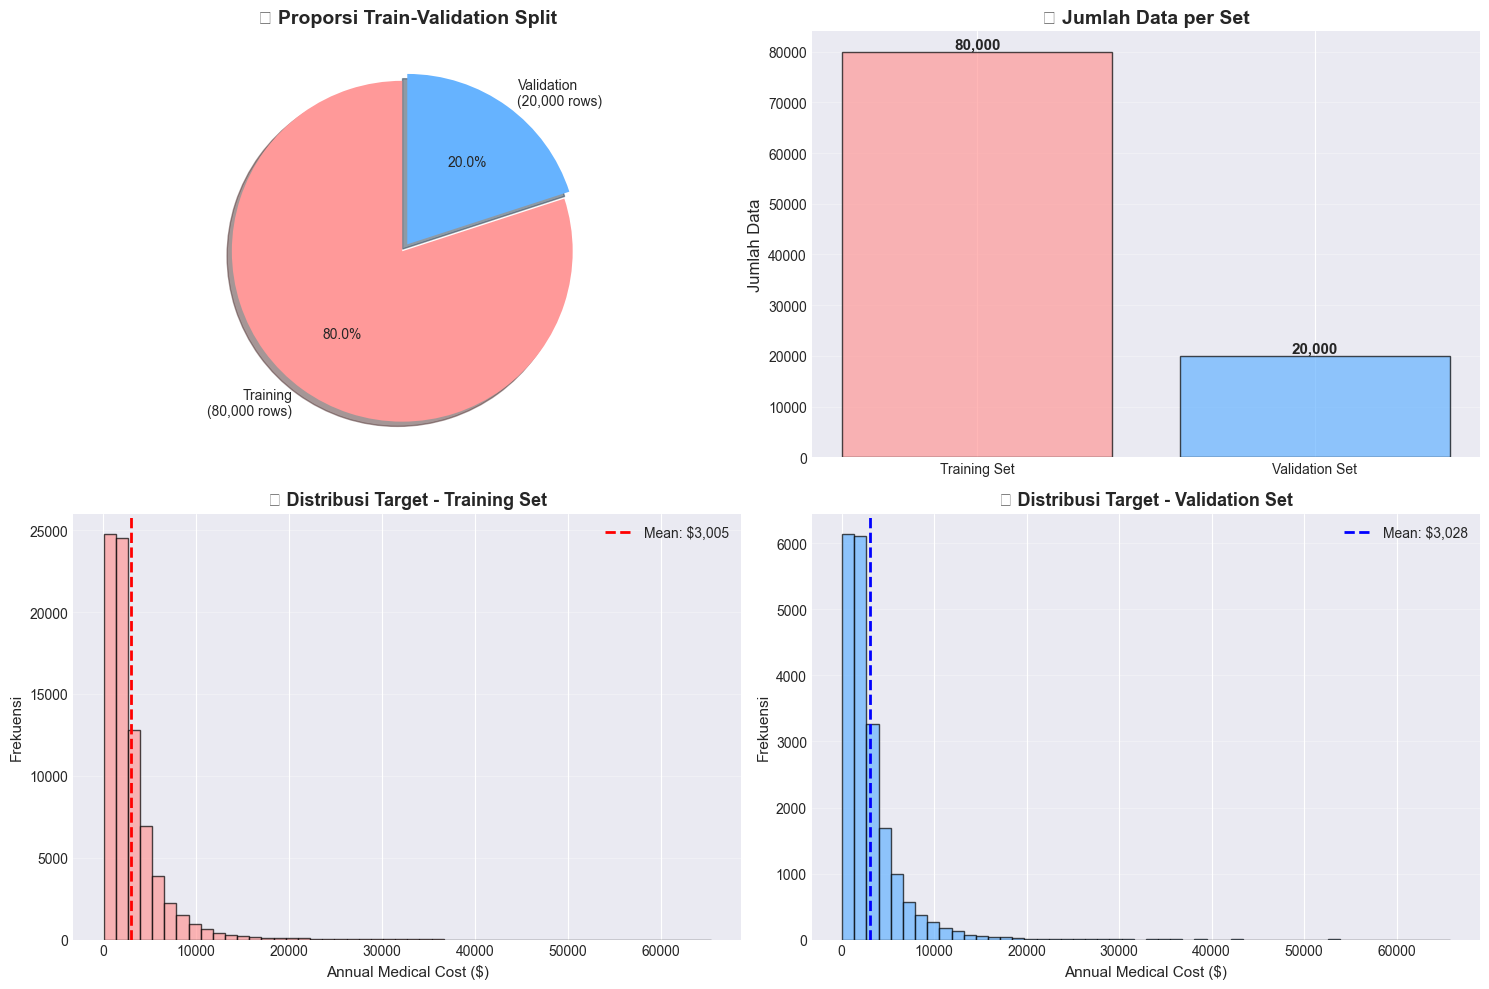


📊 PERBANDINGAN STATISTIK TARGET VARIABLE

Metrik                       Training Set       Validation Set
------------------------------------------------------------
Mean                 $           3,004.87 $           3,027.79
Median               $           2,079.42 $           2,096.47
Std Dev              $           3,125.08 $           3,136.98
Min                  $              55.55 $              55.87
Max                  $          65,431.24 $          65,724.90

✅ Distribusi target variable seimbang di kedua set!
👍 Data siap untuk training model!


In [11]:
# Visualisasi pembagian data
import warnings
# Filter warning tentang emoji yang tidak didukung font
warnings.filterwarnings('ignore', category=UserWarning, message='.*Glyph.*missing from font.*')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Pie chart untuk proporsi data
sizes = [len(X_train), len(X_val)]
labels = [f'Training\n({len(X_train):,} rows)', f'Validation\n({len(X_val):,} rows)']
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0)

axes[0, 0].pie(sizes, explode=explode, labels=labels, colors=colors, 
               autopct='%1.1f%%', shadow=True, startangle=90)
axes[0, 0].set_title('🥧 Proporsi Train-Validation Split', fontsize=14, fontweight='bold')

# 2. Bar chart untuk jumlah data
categories = ['Training Set', 'Validation Set']
values = [len(X_train), len(X_val)]
bars = axes[0, 1].bar(categories, values, color=colors, edgecolor='black', alpha=0.7)
axes[0, 1].set_ylabel('Jumlah Data', fontsize=12)
axes[0, 1].set_title('📊 Jumlah Data per Set', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Menambahkan label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Distribusi target variable - Training Set
axes[1, 0].hist(y_train, bins=50, color='#ff9999', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Annual Medical Cost ($)', fontsize=11)
axes[1, 0].set_ylabel('Frekuensi', fontsize=11)
axes[1, 0].set_title('📚 Distribusi Target - Training Set', fontsize=13, fontweight='bold')
axes[1, 0].axvline(y_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${y_train.mean():,.0f}')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Distribusi target variable - Validation Set
axes[1, 1].hist(y_val, bins=50, color='#66b3ff', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Annual Medical Cost ($)', fontsize=11)
axes[1, 1].set_ylabel('Frekuensi', fontsize=11)
axes[1, 1].set_title('🧪 Distribusi Target - Validation Set', fontsize=13, fontweight='bold')
axes[1, 1].axvline(y_val.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: ${y_val.mean():,.0f}')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistik perbandingan
print("\n" + "=" * 60)
print("📊 PERBANDINGAN STATISTIK TARGET VARIABLE")
print("=" * 60)
print(f"\n{'Metrik':<20} {'Training Set':>20} {'Validation Set':>20}")
print("-" * 60)
print(f"{'Mean':<20} ${y_train.mean():>19,.2f} ${y_val.mean():>19,.2f}")
print(f"{'Median':<20} ${y_train.median():>19,.2f} ${y_val.median():>19,.2f}")
print(f"{'Std Dev':<20} ${y_train.std():>19,.2f} ${y_val.std():>19,.2f}")
print(f"{'Min':<20} ${y_train.min():>19,.2f} ${y_val.min():>19,.2f}")
print(f"{'Max':<20} ${y_train.max():>19,.2f} ${y_val.max():>19,.2f}")
print("=" * 60)
print("\n✅ Distribusi target variable seimbang di kedua set!")
print("👍 Data siap untuk training model!")

---

### 🔍 Checkpoint Question 3
**Pikirkan sejenak:** 
1. Mengapa kita membagi data menjadi 80-20, bukan 50-50 atau 90-10?
2. Apa yang terjadi jika kita tidak membagi data sama sekali?

<details>
<summary>💭 Klik untuk melihat penjelasan</summary>

#### 1. Mengapa 80-20?

**80% Training:**
- ✅ Cukup banyak data untuk model "belajar" pattern yang kompleks
- ✅ Model bisa melihat variasi yang lebih banyak
- ❌ Jika terlalu sedikit (misal 50%), model tidak belajar dengan baik

**20% Validation:**
- ✅ Cukup banyak untuk evaluasi yang reliable
- ✅ Representatif dari populasi data
- ❌ Jika terlalu banyak (misal 50%), sisa data training tidak cukup

**Alternatif:**
- **70-30**: Untuk dataset kecil
- **90-10**: Untuk dataset sangat besar (jutaan data)
- **80-20**: Standard untuk kebanyakan kasus ✨

#### 2. Tanpa Train-Validation Split?

Ini sangat berbahaya! ⚠️

**Yang terjadi:**
- Model akan "menghafal" data training
- Accuracy di training data = 100% 🎉 (terlihat bagus!)
- Accuracy di data baru = 30% 😱 (disaster!)
- Ini disebut **OVERFITTING** - musuh terbesar ML!

**Analogi:**
Seperti siswa yang hanya menghafal jawaban soal latihan. Saat ujian dengan soal berbeda, dia tidak bisa menjawab!

**Best Practice:**
Selalu pisahkan data untuk evaluasi objektif performa model! 🎯

</details>

---

### 💾 Langkah 7: Menyimpan Data yang Sudah Dibagi (Opsional)

Untuk memudahkan pekerjaan di tahap selanjutnya, kita bisa menyimpan data yang sudah terbagi ini. Ini berguna agar kita tidak perlu melakukan split ulang setiap kali menjalankan model.

**Fungsi yang digunakan:**
- **`.to_csv()`** - Menyimpan DataFrame ke file CSV
- **`index=False`** - Tidak menyimpan nomor index (baris)

In [12]:
# Menyimpan data yang sudah dibagi ke file CSV
# Ini opsional tapi sangat membantu untuk reproducibility

try:
    # Gabungkan X dan y kembali untuk disimpan
    train_data = X_train.copy()
    train_data['annual_medical_cost'] = y_train
    
    val_data = X_val.copy()
    val_data['annual_medical_cost'] = y_val
    
    # Simpan ke file CSV
    train_data.to_csv('train_data.csv', index=False)
    val_data.to_csv('validation_data.csv', index=False)
    
    print("=" * 60)
    print("💾 MENYIMPAN DATA")
    print("=" * 60)
    print("✅ Training data disimpan ke: 'train_data.csv'")
    print("✅ Validation data disimpan ke: 'validation_data.csv'")
    print("\n📊 File yang tersimpan:")
    print(f"   - train_data.csv: {train_data.shape[0]:,} baris x {train_data.shape[1]} kolom")
    print(f"   - validation_data.csv: {val_data.shape[0]:,} baris x {val_data.shape[1]} kolom")
    print("=" * 60)
    print("\n💡 Tip: Kamu bisa menggunakan file ini untuk training model")
    print("   tanpa perlu melakukan split data lagi!")
    
except Exception as e:
    print(f"⚠️ Error saat menyimpan data: {e}")
    print("Tidak masalah, kita masih punya data di memory!")

💾 MENYIMPAN DATA
✅ Training data disimpan ke: 'train_data.csv'
✅ Validation data disimpan ke: 'validation_data.csv'

📊 File yang tersimpan:
   - train_data.csv: 80,000 baris x 54 kolom
   - validation_data.csv: 20,000 baris x 54 kolom

💡 Tip: Kamu bisa menggunakan file ini untuk training model
   tanpa perlu melakukan split data lagi!




## 🎓 Ringkasan Bagian 1: Persiapan Data

Selamat! 🎉 Kamu telah menyelesaikan tahap persiapan data untuk Machine Learning. Mari kita review apa yang sudah kita lakukan:

### ✅ Checklist Pembelajaran

#### 1️⃣ **Import Libraries**
   - Menggunakan pandas, numpy, scikit-learn untuk analisis data
   - Setting visualisasi dengan matplotlib dan seaborn

#### 2️⃣ **Load Dataset**
   - Memuat data asuransi kesehatan dengan 100,000+ baris
   - Memahami struktur data dengan berbagai features

#### 3️⃣ **Eksplorasi Data**
   - Melihat preview data dengan `.head()`
   - Mengecek tipe data dan missing values dengan `.info()`
   - Menganalisis statistik deskriptif dengan `.describe()`
   - Visualisasi distribusi target variable

#### 4️⃣ **Train-Validation Split** ⭐
   - Memisahkan features (X) dan target variable (y)
   - Membagi data menjadi 80% training dan 20% validation
   - Memastikan distribusi data seimbang di kedua set
   - Menyimpan data yang sudah dibagi (opsional)

---

### 🎯 Data Siap untuk Tahap Selanjutnya!

Data kita sekarang sudah siap untuk:
- **Section 2**: Feature Engineering & Preprocessing
- **Section 3**: Training model SVM
- **Section 4**: Training model XGBoost
- **Section 5**: Evaluasi dan perbandingan model

### 📊 Ringkasan Data Kita:

```
📚 Training Set   : 80,000 observations
🧪 Validation Set : 20,000 observations
🎯 Target Variable: annual_medical_cost
📝 Features       : 51 kolom (demographic, health, insurance info)
```

---

### 💡 Konsep Penting untuk Diingat

1. **Train-Test Split** adalah fondasi Machine Learning yang baik
2. **Random State** memastikan reproducibility
3. **Exploratory Data Analysis** membantu memahami data sebelum modeling
4. **Data Visualization** memudahkan interpretasi patterns dan distributions

---

### 🚀 Next Steps

Di bagian selanjutnya, kita akan:
- Melakukan **Feature Engineering** (membuat features baru)
- **Encoding** categorical variables (mengubah text menjadi angka)
- **Feature Scaling** (normalisasi/standardisasi)
- **Feature Selection** (memilih features yang paling penting)

Siap untuk lanjut? Let's go! 💪

---

## 🧠 Quiz Pemahaman - Test Your Knowledge!

Sebelum melanjutkan ke bagian berikutnya, coba jawab pertanyaan-pertanyaan ini untuk memastikan kamu sudah memahami konsep dasar!

### ❓ Pertanyaan 1
**Apa perbedaan antara features (X) dan target variable (y)?**

<details>
<summary>💡 Lihat Jawaban</summary>

**Features (X):**
- Variable yang digunakan untuk memprediksi
- Input untuk model
- Contoh: age, BMI, smoker, region, dll.

**Target Variable (y):**
- Variable yang ingin diprediksi
- Output dari model
- Contoh dalam kasus kita: annual_medical_cost

**Analogi Sederhana:**
Bayangkan kamu ingin memprediksi nilai ujian akhir:
- Features = jumlah jam belajar, kehadiran, nilai quiz, dll.
- Target = nilai ujian akhir

</details>

---

### ❓ Pertanyaan 2
**Mengapa kita perlu random_state=42 dalam train_test_split?**

<details>
<summary>💡 Lihat Jawaban</summary>

**Random State** membuat pembagian data menjadi **reproducible** (dapat diulang dengan hasil yang sama).

**Tanpa random_state:**
```python
# Run 1: Data A di training, Data B di validation
# Run 2: Data C di training, Data D di validation
# Hasil berbeda setiap kali! ❌
```

**Dengan random_state=42:**
```python
# Run 1: Data A di training, Data B di validation
# Run 2: Data A di training, Data B di validation
# Run 3: Data A di training, Data B di validation
# Hasil konsisten! ✅
```

**Kenapa penting?**
- Debugging lebih mudah
- Hasil research dapat direproduksi oleh orang lain
- Perbandingan model yang fair

**Kenapa 42?**
Konvensi dari buku "The Hitchhiker's Guide to the Galaxy" - "Answer to the Ultimate Question of Life" 😄

</details>

---

### ❓ Pertanyaan 3
**Dalam konteks aktuarial science, mengapa prediksi biaya medis penting?**

<details>
<summary>💡 Lihat Jawaban</summary>

**1. Penentuan Premi yang Akurat** 💰
- Premi harus cukup untuk cover biaya klaim
- Terlalu tinggi → customer pindah ke kompetitor
- Terlalu rendah → perusahaan rugi

**2. Risk Management** ⚖️
- Identifikasi high-risk individuals
- Alokasi reserves yang tepat
- Strategi underwriting yang lebih baik

**3. Product Development** 📊
- Desain produk asuransi baru
- Segmentasi pasar yang lebih baik
- Pricing strategy yang kompetitif

**4. Regulatory Compliance** 📋
- Memenuhi requirement modal minimum
- Solvency dan sustainability perusahaan

**5. Business Intelligence** 🎯
- Forecasting untuk business planning
- Optimisasi portfolio asuransi
- Identifikasi fraud patterns

**Machine Learning membuat prediksi lebih akurat dengan menangkap:**
- Non-linear relationships
- Complex interactions antar variables
- Patterns yang tidak terlihat dengan regresi tradisional

</details>

---

### 🎉 Bonus Question
**Jika dataset kita punya 1 juta rows, apakah kita masih perlu split 80-20?**

<details>
<summary>💡 Lihat Jawaban</summary>

**Tidak harus!** Untuk dataset sangat besar, kita bisa menggunakan:

**90-10 atau bahkan 95-5:**
- 10% dari 1 juta = 100,000 data (sudah sangat cukup untuk validation!)
- 90% training = 900,000 data (excellent untuk model belajar!)

**Prinsip umum:**
- Dataset kecil (<10k): 70-30 atau 80-20
- Dataset medium (10k-100k): 80-20 ✨ (standard)
- Dataset besar (>100k): 80-20 atau 90-10
- Dataset sangat besar (>1M): 90-10 atau 95-5

**Yang penting:**
- Validation set harus representatif
- Minimal ~1,000 samples untuk validation yang reliable
- Training set harus cukup besar untuk model belajar patterns yang kompleks

**Trade-off:**
```
More Training Data ➜ Better Model Performance
More Validation Data ➜ More Reliable Evaluation
```

Cari sweet spot yang pas! 🎯

</details>

---